In [51]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [52]:
df = pd.read_csv('Python_ich/Deals.csv')
df.head()

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
0,5.805028e+18,Ben Hall,NaN,NaN,New Lead,NaN,/eng/test,03.07.23women,NaN,v16,...,NaN,NaN,21.06.2024 15:30,NaN,NaN,NaN,NaN,5.805028e+18,NaN,NaN
1,5.805028e+18,Ulysses Adams,NaN,NaN,New Lead,NaN,/at-eng,NaN,NaN,NaN,...,Web Developer,Morning,21.06.2024 15:23,6.0,NaN,0,"2,000.00",5.805028e+18,NaN,NaN
2,5.805028e+18,Ulysses Adams,21.06.2024,D - Non Target,Lost,Non target,/at-eng,engwien_AT,0:26:43,b1-at,...,NaN,NaN,21.06.2024 14:45,NaN,NaN,NaN,NaN,5.805028e+18,NaN,NaN
3,5.805028e+18,Eva Kent,21.06.2024,E - Non Qualified,Lost,Invalid number,/eng,04.07.23recentlymoved_DE,1:00:04,bloggersvideo14com,...,NaN,NaN,21.06.2024 13:32,NaN,NaN,NaN,NaN,5.805028e+18,NaN,NaN
4,5.805028e+18,Ben Hall,21.06.2024,D - Non Target,Lost,Non target,/eng,discovery_DE,0:53:12,website,...,NaN,NaN,21.06.2024 13:21,NaN,NaN,NaN,NaN,5.805028e+18,NaN,NaN


In [53]:
df['Id'] = df['Id'].apply(lambda x: '{:.0f}'.format(float(x)))
df['Contact Name'] = df['Contact Name'].apply(lambda x: '{:.0f}'.format(float(x)) if pd.notna(x) else x)

print(df[['Id', 'Contact Name']].head())

                    Id         Contact Name
0  5805028000056864768  5805028000056849408
1  5805028000056859648  5805028000056834048
2  5805028000056832000  5805028000056854528
3  5805028000056823808  5805028000056889344
4  5805028000056873984  5805028000056876032


In [54]:
df['Closing Date'] = pd.to_datetime(df['Closing Date'], format='%d.%m.%Y', errors='coerce')
df['Created Time'] = pd.to_datetime(df['Created Time'], dayfirst=True)
df['SLA'] = pd.to_timedelta(df['SLA'], errors='coerce')
df['SLA'] = df['SLA'].apply(lambda x: str(x).split(' ')[-1] if pd.notnull(x) else x)

In [55]:
# df['Campaign_Name'] = df['Campaign'].str.extract(r'([a-zA-Z0-9_]+)$')
# df.drop('Campaign', axis=1, inplace=True)

# df.head()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21595 entries, 0 to 21594
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   21595 non-null  object        
 1   Deal Owner Name      21564 non-null  object        
 2   Closing Date         14645 non-null  datetime64[ns]
 3   Quality              19340 non-null  object        
 4   Stage                21593 non-null  object        
 5   Lost Reason          16124 non-null  object        
 6   Page                 21593 non-null  object        
 7   Campaign             16067 non-null  object        
 8   SLA                  15533 non-null  object        
 9   Content              14147 non-null  object        
 10  Term                 12454 non-null  object        
 11  Source               21593 non-null  object        
 12  Payment Type         496 non-null    object        
 13  Product              3592 non-n

In [57]:
df.describe()

,Closing Date,Created Time,Course duration,Months of study
count,14645,21593,3587.000000,840.000000
mean,2024-01-27 16:37:43.489245440,2024-01-27 01:44:13.334877184,10.198495,5.442857
min,2022-10-11 00:00:00,2023-07-03 17:03:00,6.000000,0.000000
25%,2023-11-11 00:00:00,2023-11-18 13:33:00,11.000000,3.000000
50%,2024-02-07 00:00:00,2024-02-05 07:46:00,11.000000,5.000000
75%,2024-04-17 00:00:00,2024-04-13 19:19:00,11.000000,8.000000
max,2024-12-11 00:00:00,2024-06-21 15:30:00,11.000000,11.000000
std,NaN,NaN,1.834681,2.919920


In [58]:
text_columns_df = df.select_dtypes(include=['object'])

text_columns_df.describe()

,Id,Deal Owner Name,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,Term,Source,Payment Type,Product,Education Type,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
count,21595,21564,19340,21593,16124,21593,16067,15533,14147,12454,21593,496,3592,3300,4165,4185,21532,2511,1251
unique,8630,27,6,13,21,34,154,13025,187,220,13,3,5,3,24,21,8266,876,215
top,5805028000054231040,Charlie Davis,E - Non Qualified,Lost,Doesn't Answer,/eng,performancemax_digitalmarkt_ru_DE,01:35:46,_{region_name}_,wide,Facebook Ads,Recurring Payments,Digital Marketing,Morning,1000,"11,000.00",5805028000003014656,-,B1
freq,27,2963,7634,15743,4135,5814,2653,6,3258,3675,4850,350,1990,2895,2623,1860,59,348,219


In [59]:
df[df.duplicated(subset=['Deal Owner Name', 'Closing Date', 'Quality', 
                                      'Stage', 'Lost Reason', 'Page', 'Campaign', 'SLA', 
                                      'Content', 'Term', 'Source', 'Payment Type', 'Product',
                                      'Education Type', 'Created Time', 'Course duration', 
                                      'Months of study', 'Initial Amount Paid', 'Offer Total Amount',
                                      'Contact Name', 'City', 'Level of Deutsch'], 
                              keep=False)]

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
1067,5805028000054268928,John Doe,NaT,NaN,New Lead,NaN,/webinar,NaN,NaT,NaN,...,NaN,NaN,2024-06-10 12:37:00,NaN,NaN,NaN,NaN,5805028000005447680,NaN,NaN
1069,5805028000054268928,John Doe,NaT,NaN,New Lead,NaN,/webinar,NaN,NaT,NaN,...,NaN,NaN,2024-06-10 12:37:00,NaN,NaN,NaN,NaN,5805028000005447680,NaN,NaN
11084,5805028000029581312,Charlie Davis,NaT,NaN,Registered on Webinar,NaN,/workshop,NaN,NaT,NaN,...,NaN,NaN,2024-02-01 20:45:00,NaN,NaN,NaN,NaN,5805028000025816064,NaN,NaN
11085,5805028000029577216,Charlie Davis,NaT,NaN,Registered on Webinar,NaN,/workshop,NaN,NaT,NaN,...,NaN,NaN,2024-02-01 20:45:00,NaN,NaN,NaN,NaN,5805028000025816064,NaN,NaN
14754,5805028000020284416,Charlie Davis,NaT,NaN,Registered on Webinar,NaN,/workshop,NaN,NaT,invitation,...,NaN,NaN,2023-12-08 22:06:00,NaN,NaN,NaN,NaN,5805028000020420608,NaN,NaN
14755,5805028000020419584,Charlie Davis,NaT,NaN,Registered on Webinar,NaN,/workshop,NaN,NaT,invitation,...,NaN,NaN,2023-12-08 22:06:00,NaN,NaN,NaN,NaN,5805028000020420608,NaN,NaN
14807,5805028000020314112,Diana Evans,NaT,NaN,Registered on Webinar,NaN,/workshop,NaN,NaT,invitation,...,NaN,NaN,2023-12-08 15:44:00,NaN,NaN,NaN,NaN,5805028000020300800,NaN,NaN
14808,5805028000020284416,Diana Evans,NaT,NaN,Registered on Webinar,NaN,/workshop,NaN,NaT,invitation,...,NaN,NaN,2023-12-08 15:44:00,NaN,NaN,NaN,NaN,5805028000020300800,NaN,NaN
14914,5805028000019926016,Rachel White,2023-12-07,E - Non Qualified,Lost,Duplicate,/,NaN,NaT,NaN,...,NaN,NaN,2023-12-07 09:15:00,NaN,NaN,NaN,NaN,5805028000008184832,NaN,NaN
14915,5805028000019917824,Rachel White,2023-12-07,E - Non Qualified,Lost,Duplicate,/,NaN,NaT,NaN,...,NaN,NaN,2023-12-07 09:15:00,NaN,NaN,NaN,NaN,5805028000008184832,NaN,NaN


In [60]:
df_cleaned = df.drop_duplicates(subset=['Deal Owner Name', 'Closing Date', 'Quality', 
                                      'Stage', 'Lost Reason', 'Page', 'Campaign', 'SLA', 
                                      'Content', 'Term', 'Source', 'Payment Type', 'Product',
                                      'Education Type', 'Created Time', 'Course duration', 
                                      'Months of study', 'Initial Amount Paid', 'Offer Total Amount',
                                      'Contact Name', 'City', 'Level of Deutsch'], keep=False)

In [61]:
df_cleaned[df_cleaned.duplicated(subset=['Deal Owner Name', 'Closing Date', 'Quality', 
                                      'Stage', 'Lost Reason', 'Page', 'Campaign', 'SLA', 
                                      'Content', 'Term', 'Source', 'Payment Type', 'Product',
                                      'Education Type', 'Created Time', 'Course duration', 
                                      'Months of study', 'Initial Amount Paid', 'Offer Total Amount',
                                      'Contact Name', 'City', 'Level of Deutsch'], 
                              keep=False)]

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch


In [ ]:
# Transform values in columns using .loc
df_cleaned.loc[:, 'Initial Amount Paid'] = df_cleaned['Initial Amount Paid'].replace({',': ''}, regex=True).astype(float)
df_cleaned.loc[:, 'Offer Total Amount'] = df_cleaned['Offer Total Amount'].replace({',': ''}, regex=True).astype(float)

In [ ]:
# Define train_data and predict_data (example data splitting, adjust according to your conditions)
train_data = df_cleaned[df_cleaned['Campaign'].notna()].copy()  # Data for training
predict_data = df_cleaned[df_cleaned['Campaign'].isna()].copy()  # Data where Campaign needs to be predicted

# Create LabelEncoders for Campaign, Term, Content, Page, and Source
le_campaign = LabelEncoder()
le_page = LabelEncoder()  # For encoding the Page column
le_source = LabelEncoder()  # For encoding the Source column
le = LabelEncoder()  # Create a new LabelEncoder for other columns

# Encode categorical data for training
train_data['Campaign_encoded'] = le_campaign.fit_transform(train_data['Campaign'].astype(str))
train_data['Term_encoded'] = le.fit_transform(train_data['Term'].astype(str))
train_data['Content_encoded'] = le.fit_transform(train_data['Content'].astype(str))

# Encode Page and Source columns
train_data['Page_encoded'] = le_page.fit_transform(train_data['Page'].astype(str))
train_data['Source_encoded'] = le_source.fit_transform(train_data['Source'].astype(str))

# Check if the necessary columns exist in predict_data and encode them
if 'Page_encoded' not in predict_data.columns:
    predict_data.loc[:, 'Page_encoded'] = predict_data['Page'].apply(lambda x: le_page.transform([x])[0] if x in le_page.classes_ else -1)
if 'Source_encoded' not in predict_data.columns:
    predict_data.loc[:, 'Source_encoded'] = predict_data['Source'].apply(lambda x: le_source.transform([x])[0] if x in le_source.classes_ else -1)

# Encode Term and Content data for prediction
predict_data.loc[:, 'Term_encoded'] = predict_data['Term'].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
predict_data.loc[:, 'Content_encoded'] = predict_data['Content'].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# Prepare data for training
X_train = train_data[['Page_encoded', 'Source_encoded', 'Term_encoded', 'Content_encoded']]
y_train = train_data['Campaign_encoded']

# Use RandomOverSampler for class balancing
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)

# Train a Random Forest model on balanced data
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train_balanced, y_train_balanced)

# Perform cross-validation on balanced data
scores_rf_balanced = cross_val_score(clf_rf, X_train_balanced, y_train_balanced, cv=5)
print(f"Average accuracy of Random Forest model after balancing: {scores_rf_balanced.mean()}")

# Make predictions for data where Campaign needs to be filled
predicted_campaign_rf = clf_rf.predict(predict_data[['Page_encoded', 'Source_encoded', 'Term_encoded', 'Content_encoded']])

# Restore original labels (decode)
predicted_campaign_labels_rf = le_campaign.inverse_transform(predicted_campaign_rf)

# Check that the number of predicted values matches the number of NaNs in the Campaign column
num_nan = df_cleaned['Campaign'].isna().sum()

if len(predicted_campaign_labels_rf) == num_nan:
    # Update DataFrame with new predicted values for Campaign
    df_cleaned.loc[df_cleaned['Campaign'].isna(), 'Campaign'] = predicted_campaign_labels_rf
else:
    print(f"Error: Number of predicted values ({len(predicted_campaign_labels_rf)}) does not match number of NaNs ({num_nan}).")

Средняя точность модели Random Forest после балансировки: 0.9009120965693226


In [64]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21573 entries, 0 to 21594
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   21573 non-null  object        
 1   Deal Owner Name      21542 non-null  object        
 2   Closing Date         14633 non-null  datetime64[ns]
 3   Quality              19328 non-null  object        
 4   Stage                21571 non-null  object        
 5   Lost Reason          16112 non-null  object        
 6   Page                 21571 non-null  object        
 7   Campaign             21573 non-null  object        
 8   SLA                  15533 non-null  object        
 9   Content              14133 non-null  object        
 10  Term                 12450 non-null  object        
 11  Source               21571 non-null  object        
 12  Payment Type         496 non-null    object        
 13  Product              3592 non-null  

In [65]:
df_cleaned.describe()

,Closing Date,Created Time,Course duration,Months of study
count,14633,21571,3587.000000,840.000000
mean,2024-01-27 19:35:05.186906368,2024-01-27 03:46:54.676185600,10.198495,5.442857
min,2022-10-11 00:00:00,2023-07-03 17:03:00,6.000000,0.000000
25%,2023-11-11 00:00:00,2023-11-18 13:40:00,11.000000,3.000000
50%,2024-02-07 00:00:00,2024-02-05 09:37:00,11.000000,5.000000
75%,2024-04-17 00:00:00,2024-04-13 19:47:00,11.000000,8.000000
max,2024-12-11 00:00:00,2024-06-21 15:30:00,11.000000,11.000000
std,NaN,NaN,1.834681,2.919920


In [ ]:
# Find rows where Initial Amount Paid is greater than Offer Total Amount
condition = df_cleaned['Initial Amount Paid'] > df_cleaned['Offer Total Amount']

# Display rows that match this condition
rows_to_update = df_cleaned[condition]

rows_to_update.head()

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
1279,5805028000053718016,Ben Hall,NaT,C - Low,Call Delayed,NaN,/direct,blog2_DE,01:48:36,NaN,...,Web Developer,Morning,2024-06-06 14:53:00,6.0,NaN,3000.0,2900.0,5805028000053715968,NaN,NaN
1393,5805028000053560320,Cara Iverson,2024-06-07,D - Non Target,Lost,Non target,/eng,Berlin_DE,05:42:51,b6,...,UX/UI Design,Morning,2024-06-05 08:50:00,11.0,NaN,11500.0,11000.0,5805028000053533696,Zwickau,NaN
1409,5805028000053462016,Charlie Davis,NaT,D - Non Target,Lost,Gutstein refusal,/eng,performancemax_eng_DE,13:22:11,_{region_name}_,...,UX/UI Design,Morning,2024-06-04 21:24:00,11.0,NaN,11500.0,11000.0,5805028000053471232,Aschaffenburg,Б2
1440,5805028000053242880,Cara Iverson,NaT,A - High,Waiting For Payment,NaN,/direct,blog2_DE,00:39:03,NaN,...,UX/UI Design,Morning,2024-06-04 12:48:00,11.0,NaN,11500.0,11000.0,5805028000053244928,Straubing,NaN
1452,5805028000053242880,Quincy Vincent,2024-06-05,D - Non Target,Lost,Non target,/eng,Live_DE,00:18:50,b0,...,UX/UI Design,Morning,2024-06-04 11:13:00,11.0,NaN,11500.0,11000.0,5805028000053279744,Augsburg,NaN


In [ ]:
# Condition for rows where 'Initial Amount Paid' is greater than 'Offer Total Amount'
condition = df_cleaned['Initial Amount Paid'] > df_cleaned['Offer Total Amount']

# For rows matching this condition, replace 'Offer Total Amount' values with 'Initial Amount Paid' values
df_cleaned.loc[condition, 'Offer Total Amount'] = df_cleaned.loc[condition, 'Initial Amount Paid']

# Check how many rows were updated
print(f"Number of rows where 'Offer Total Amount' was replaced: {condition.sum()}")

# Display the updated rows for verification
df_cleaned.head()

Количество строк, в которых значение 'Offer Total Amount' было заменено: 58


,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
0,5805028000056864768,Ben Hall,NaT,NaN,New Lead,NaN,/eng/test,03.07.23women,NaT,v16,...,NaN,NaN,2024-06-21 15:30:00,NaN,NaN,NaN,NaN,5805028000056849408,NaN,NaN
1,5805028000056859648,Ulysses Adams,NaT,NaN,New Lead,NaN,/at-eng,brand_search_eng_DE,NaT,NaN,...,Web Developer,Morning,2024-06-21 15:23:00,6.0,NaN,0.0,2000.0,5805028000056834048,NaN,NaN
2,5805028000056832000,Ulysses Adams,2024-06-21,D - Non Target,Lost,Non target,/at-eng,engwien_AT,00:26:43,b1-at,...,NaN,NaN,2024-06-21 14:45:00,NaN,NaN,NaN,NaN,5805028000056854528,NaN,NaN
3,5805028000056823808,Eva Kent,2024-06-21,E - Non Qualified,Lost,Invalid number,/eng,04.07.23recentlymoved_DE,01:00:04,bloggersvideo14com,...,NaN,NaN,2024-06-21 13:32:00,NaN,NaN,NaN,NaN,5805028000056889344,NaN,NaN
4,5805028000056873984,Ben Hall,2024-06-21,D - Non Target,Lost,Non target,/eng,discovery_DE,00:53:12,website,...,NaN,NaN,2024-06-21 13:21:00,NaN,NaN,NaN,NaN,5805028000056876032,NaN,NaN


In [68]:
percent_missing = (df_cleaned.isnull().sum() / df_cleaned.shape[0] * 100).round(2)
percent_missing_with_sign = percent_missing.apply(lambda x: f"{x}%")
output = f"\n{percent_missing_with_sign.to_string()}"
print(output)


Id                       0.0%
Deal Owner Name         0.14%
Closing Date           32.17%
Quality                10.41%
Stage                   0.01%
Lost Reason            25.31%
Page                    0.01%
Campaign                 0.0%
SLA                     28.0%
Content                34.49%
Term                   42.29%
Source                  0.01%
Payment Type            97.7%
Product                83.35%
Education Type          84.7%
Created Time            0.01%
Course duration        83.37%
Months of study        96.11%
Initial Amount Paid    80.72%
Offer Total Amount     80.63%
Contact Name            0.29%
City                   88.36%
Level of Deutsch        94.2%


In [ ]:
# Remove rows with '#REF!' in the 'Education Type' column
df_cleaned = df_cleaned[~df_cleaned['Education Type'].str.contains('#REF!', case=False, na=False)]

# Check if any rows with '#REF!' remain in the table
ref_check = df_cleaned[df_cleaned['Education Type'].str.contains('#REF!', case=False, na=False)]

# Display the result
ref_check

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch


In [ ]:
# Convert the 'Closing Date' column to datetime format (if not already in this format)
df_cleaned['Closing Date'] = pd.to_datetime(df_cleaned['Closing Date'], errors='coerce')

# Filter rows where 'Closing Date' is after March 7, 2024
df_closing_after_march = df_cleaned[df_cleaned['Closing Date'] > '2024-07-03']

# Display the result
df_closing_after_march

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
12806,5805028000025477120,Nina Scott,2024-12-11,D - Non Target,Lost,Non target,/eng/test,BloggerShina_DE,00:18:19,NaN,...,NaN,NaN,2024-01-11 16:03:00,NaN,NaN,NaN,NaN,5805028000016832512,NaN,NaN
13598,5805028000023037952,Victor Barnes,2024-09-25,D - Non Target,Lost,Gutstein refusal,/eng,12.07.2023wide_DE,00:12:28,bloggersvideo9com,...,Digital Marketing,Morning,2023-12-26 10:57:00,11.0,NaN,1000.0,11000.0,5805028000005950464,Neuburg an der Donau,Проходит сейчас повторно B1


In [ ]:
# Modify the date in the row with index 12806
df_cleaned.loc[12806, 'Closing Date'] = '2024-02-11'

# Modify the date in the row with index 13598
df_cleaned.loc[13598, 'Closing Date'] = '2024-05-25'

In [ ]:
# Convert 'Created Time' to datetime format, if not already done
df_cleaned['Created Time'] = pd.to_datetime(df_cleaned['Created Time'], errors='coerce')

# Convert 'Created Time' to date format without time
df_cleaned['Created Date'] = df_cleaned['Created Time'].dt.date

# Convert 'Closing Date' to datetime format if necessary
df_cleaned['Closing Date'] = pd.to_datetime(df_cleaned['Closing Date'], errors='coerce')

# Compare Closing Date with Created Date (without time)
df_filtered = df_cleaned[df_cleaned['Closing Date'] < df_cleaned['Created Date']]

# Keep only the necessary columns
df_result = df_filtered[['Id', 'Created Time', 'Closing Date', 'Deal Owner Name', 'Course duration', 'Months of study', 'Initial Amount Paid', 'Offer Total Amount', 'Product', 'Stage']]

df_result.to_pickle('Manager_Error.pkl')

In [73]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21572 entries, 0 to 21593
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   21572 non-null  object        
 1   Deal Owner Name      21542 non-null  object        
 2   Closing Date         14633 non-null  datetime64[ns]
 3   Quality              19328 non-null  object        
 4   Stage                21571 non-null  object        
 5   Lost Reason          16112 non-null  object        
 6   Page                 21571 non-null  object        
 7   Campaign             21572 non-null  object        
 8   SLA                  15533 non-null  object        
 9   Content              14133 non-null  object        
 10  Term                 12450 non-null  object        
 11  Source               21571 non-null  object        
 12  Payment Type         496 non-null    object        
 13  Product              3592 non-null  

In [ ]:
# Convert Initial Amount Paid to numeric format for correct processing
df_cleaned['Initial Amount Paid'] = pd.to_numeric(df_cleaned['Initial Amount Paid'], errors='coerce')
df_cleaned['Offer Total Amount'] = pd.to_numeric(df_cleaned['Offer Total Amount'], errors='coerce')

# Remove rows where Stage = 'Payment Done' and 'Months of study' or 'Initial Amount Paid' are 0 or NaN
df_cleaned = df_cleaned[~(
    (df_cleaned['Stage'] == 'Payment Done') & 
    ((df_cleaned['Months of study'].isna()) | (df_cleaned['Months of study'] == 0) |
     df_cleaned['Initial Amount Paid'].isna() | (df_cleaned['Initial Amount Paid'] == 0))
)]

In [ ]:
# List of row indices for updating
indices_to_update = [
    1484, 2759, 3254, 3366, 3867, 5077, 5896, 8065, 8154, 8162, 
    8316, 8535, 10610, 11120, 11277, 12363, 15500, 15686, 15696, 15778, 17343
]

# List of correct Ids
correct_ids = [
    '5805028000053253120', '5805028000049558528', '5805028000048353280', 
    '5805028000048041984', '5805028000046984192', '5805028000043979776', 
    '5805028000043008000', '5805028000037494784', '5805028000037097472', 
    '5805028000037112832', '5805028000036632576', '5805028000036024320', 
    '5805028000030480384', '5805028000029661184', '5805028000029131776', 
    '5805028000026243072', '5805028000018560000', '5805028000018230272', 
    '5805028000018152448', '5805028000018163712', '5805028000014052352'
]

# List of correct values for Offer Total Amount
correct_values = [
    2900.0, 11000.0, 11000.0, 11000.0, 11000.0, 3000.0, 3000.0, 3000.0, 
    3000.0, 3000.0, 3000.0, 3000.0, 3000.0, 3000.0, 3000.0, 1200.0, 2500.0, 
    2900.0, 2500.0, 1200.0, 2500.0
]

# Update values for rows with the corresponding indices
df_cleaned.loc[indices_to_update, 'Offer Total Amount'] = correct_values

# Check updates
print(df_cleaned.loc[indices_to_update, ['Id', 'Offer Total Amount']])


                        Id  Offer Total Amount
1484   5805028000053253120              2900.0
2759   5805028000049558528             11000.0
3254   5805028000048353280             11000.0
3366   5805028000048041984             11000.0
3867   5805028000046984192             11000.0
5077   5805028000043979776              3000.0
5896   5805028000043008000              3000.0
8065   5805028000037494784              3000.0
8154   5805028000037097472              3000.0
8162   5805028000037112832              3000.0
8316   5805028000036632576              3000.0
8535   5805028000036024320              3000.0
10610  5805028000030480384              3000.0
11120  5805028000029661184              3000.0
11277  5805028000029131776              3000.0
12363  5805028000026243072              1200.0
15500  5805028000018560000              2500.0
15686  5805028000018230272              2900.0
15696  5805028000018152448              2500.0
15778  5805028000018163712              1200.0
17343  580502

In [ ]:
# 2. Filter df_d by Stage = 'Payment Done' and Months of study > 0
df_d_filtered = df_cleaned[(df_cleaned['Stage'] == 'Payment Done') & (df_cleaned['Months of study'] > 0)]

# Count the number of rows after filtering
num_filtered_rows = df_d_filtered.shape[0]

# Output the number of rows
print(f"Number of rows where Stage = 'Payment Done' and Months of study > 0: {num_filtered_rows}")

# 3. Create the 'Sum_Paid' column based on the formula
df_d_filtered['Sum_Paid'] = (df_d_filtered['Offer Total Amount'] / df_d_filtered['Course duration']) * df_d_filtered['Months of study']

# Calculate the sum of the new 'Sum_Paid' column
total_sum_paid = df_d_filtered['Sum_Paid'].sum()

# Output the sum of 'Sum_Paid'
print(f"Sum of the 'Sum_Paid' column in the filtered df_d table: {total_sum_paid}")

# Calculate the sum of the 'Course duration' column
total_course_duration = df_d_filtered['Course duration'].sum()

# Calculate the sum of the 'Months of study' column
total_months_of_study = df_d_filtered['Months of study'].sum()

# Calculate the sum of the 'Offer Total Amount' column
total_offer_total_amount = df_d_filtered['Offer Total Amount'].sum()

# Output the results
print(f"Sum of 'Course duration': {total_course_duration}")

Количество строк, где Stage = 'Payment Done' и Months of study > 0: 838
Сумма по столбцу 'Sum_Paid' в отфильтрованной таблице df_d: 3340287.878787879
Сумма по 'Course duration': 8533.0
Сумма по 'Months of study': 4561.0
Сумма по 'Offer Total Amount': 6323300.0


/var/folders/3f/yr1j00f96tn08rvm88vpmbsw0000gn/T/ipykernel_45288/2002384391.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d_filtered['Sum_Paid'] = (df_d_filtered['Offer Total Amount'] / df_d_filtered['Course duration']) * df_d_filtered['Months of study']


In [79]:
df_cleaned.to_pickle('Deals.pkl')

In [80]:
df_new = pd.read_pickle('Deals.pkl')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21552 entries, 0 to 21593
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   21552 non-null  object        
 1   Deal Owner Name      21523 non-null  object        
 2   Closing Date         14629 non-null  datetime64[ns]
 3   Quality              19308 non-null  object        
 4   Stage                21551 non-null  object        
 5   Lost Reason          16097 non-null  object        
 6   Page                 21551 non-null  object        
 7   Campaign             21552 non-null  object        
 8   SLA                  15515 non-null  object        
 9   Content              14122 non-null  object        
 10  Term                 12442 non-null  object        
 11  Source               21551 non-null  object        
 12  Payment Type         492 non-null    object        
 13  Product              3589 non-null  

In [81]:
df_new.describe()

,Closing Date,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount
count,14629,21551,3585.000000,838.000000,4154.000000,4174.000000
mean,2024-01-27 18:40:58.404538880,2024-01-27 05:41:34.951510528,10.198047,5.442721,952.530332,7160.018927
min,2022-10-11 00:00:00,2023-07-03 17:03:00,6.000000,1.000000,0.000000,0.000000
25%,2023-11-11 00:00:00,2023-11-18 14:30:30,11.000000,3.000000,300.000000,3000.000000
50%,2024-02-07 00:00:00,2024-02-05 11:43:00,11.000000,5.000000,1000.000000,11000.000000
75%,2024-04-17 00:00:00,2024-04-13 20:17:00,11.000000,8.000000,1000.000000,11000.000000
max,2024-06-25 00:00:00,2024-06-21 15:30:00,11.000000,11.000000,11500.000000,11500.000000
std,NaN,NaN,1.835095,2.911016,1423.233702,4625.863774


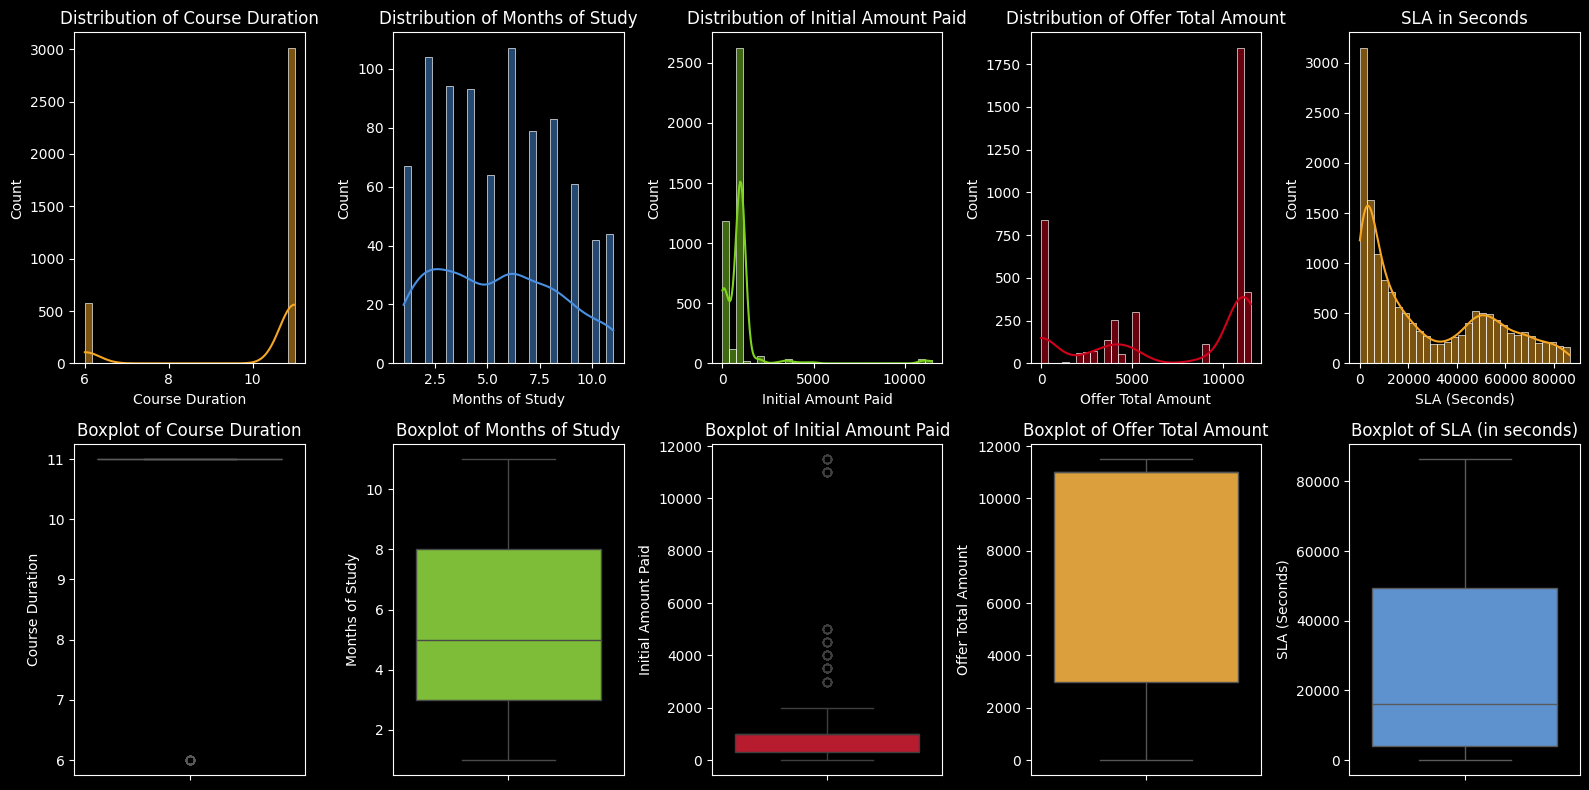

In [ ]:
# 2. Filter df_d by Stage = 'Payment Done' and Months of study > 0
df_d_filtered = df_cleaned[(df_cleaned['Stage'] == 'Payment Done') & (df_cleaned['Months of study'] > 0)]

# Count the number of rows after filtering
num_filtered_rows = df_d_filtered.shape[0]

# Output the number of rows
print(f"Number of rows where Stage = 'Payment Done' and Months of study > 0: {num_filtered_rows}")

# 3. Create the 'Sum_Paid' column based on the formula
df_d_filtered['Sum_Paid'] = (df_d_filtered['Offer Total Amount'] / df_d_filtered['Course duration']) * df_d_filtered['Months of study']

# Calculate the sum of the new 'Sum_Paid' column
total_sum_paid = df_d_filtered['Sum_Paid'].sum()

# Output the sum of 'Sum_Paid'
print(f"Sum of the 'Sum_Paid' column in the filtered df_d table: {total_sum_paid}")

# Calculate the sum of the 'Course duration' column
total_course_duration = df_d_filtered['Course duration'].sum()

# Calculate the sum of the 'Months of study' column
total_months_of_study = df_d_filtered['Months of study'].sum()

# Calculate the sum of the 'Offer Total Amount' column
total_offer_total_amount = df_d_filtered['Offer Total Amount'].sum()

# Output the results
print(f"Sum of 'Course duration': {total_course_duration}")
print(f"Sum of 'Months of study': {total_months_of_study}")
print(f"Sum of 'Offer Total Amount': {total_offer_total_amount}")

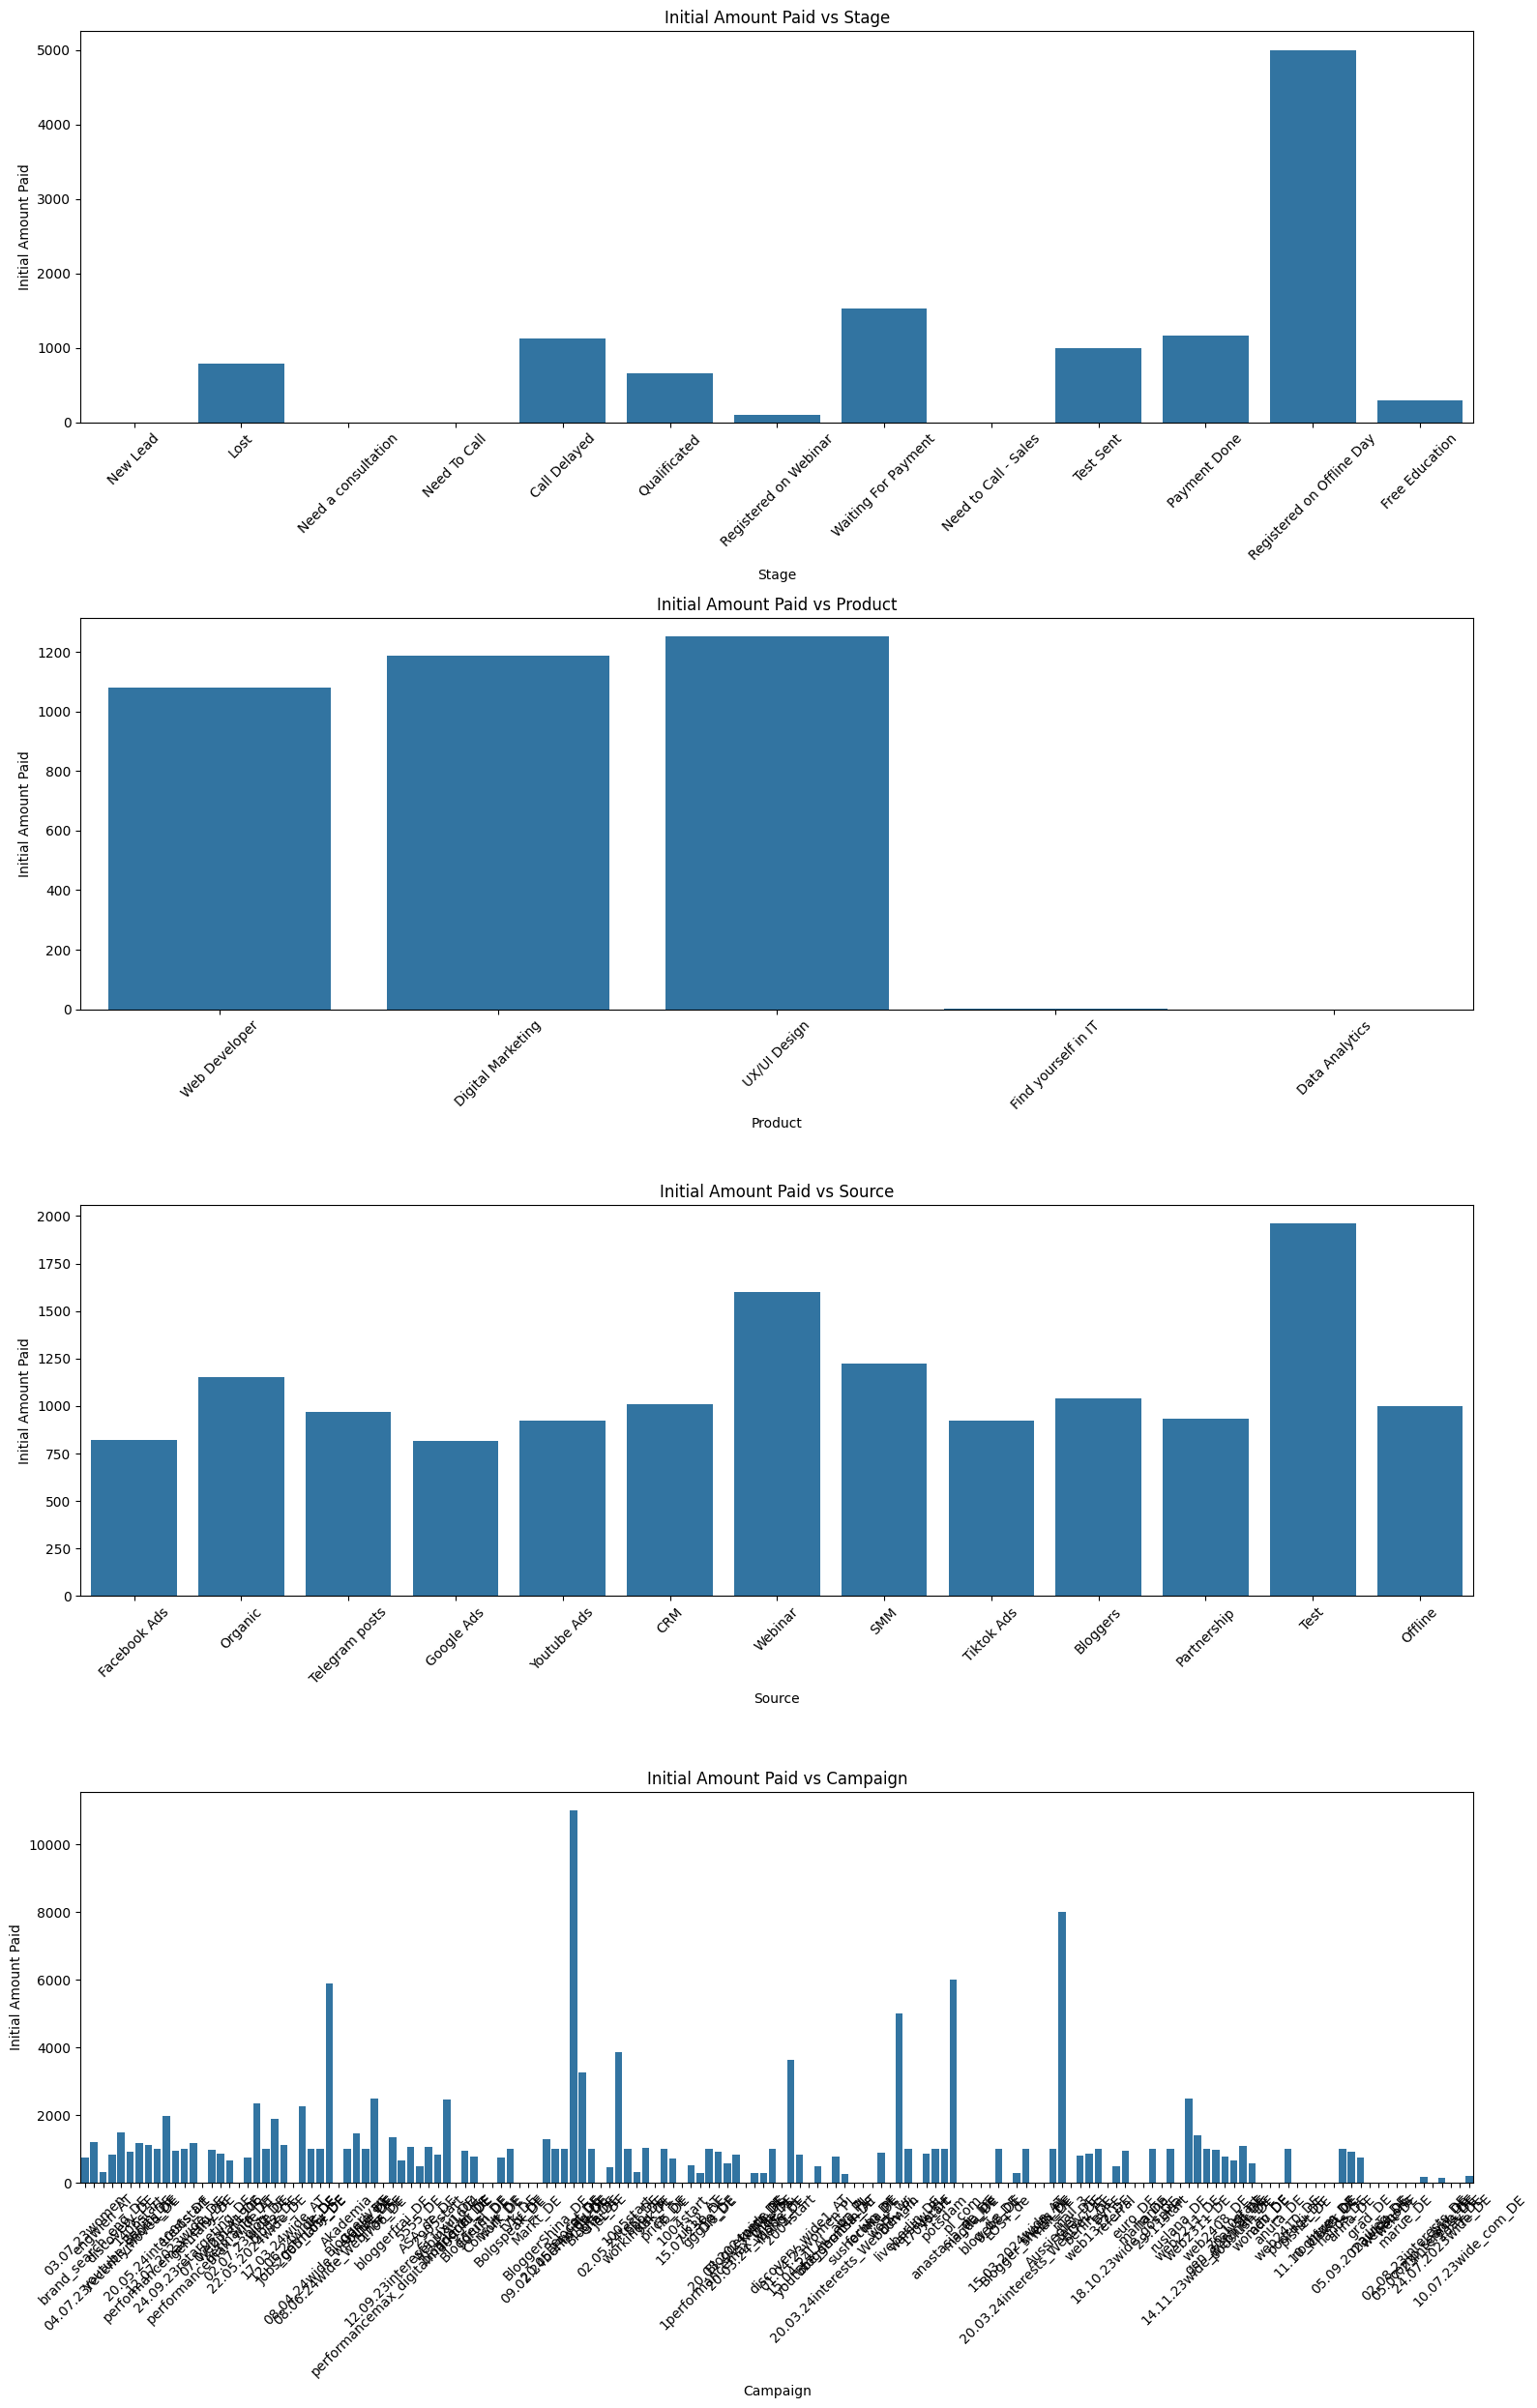

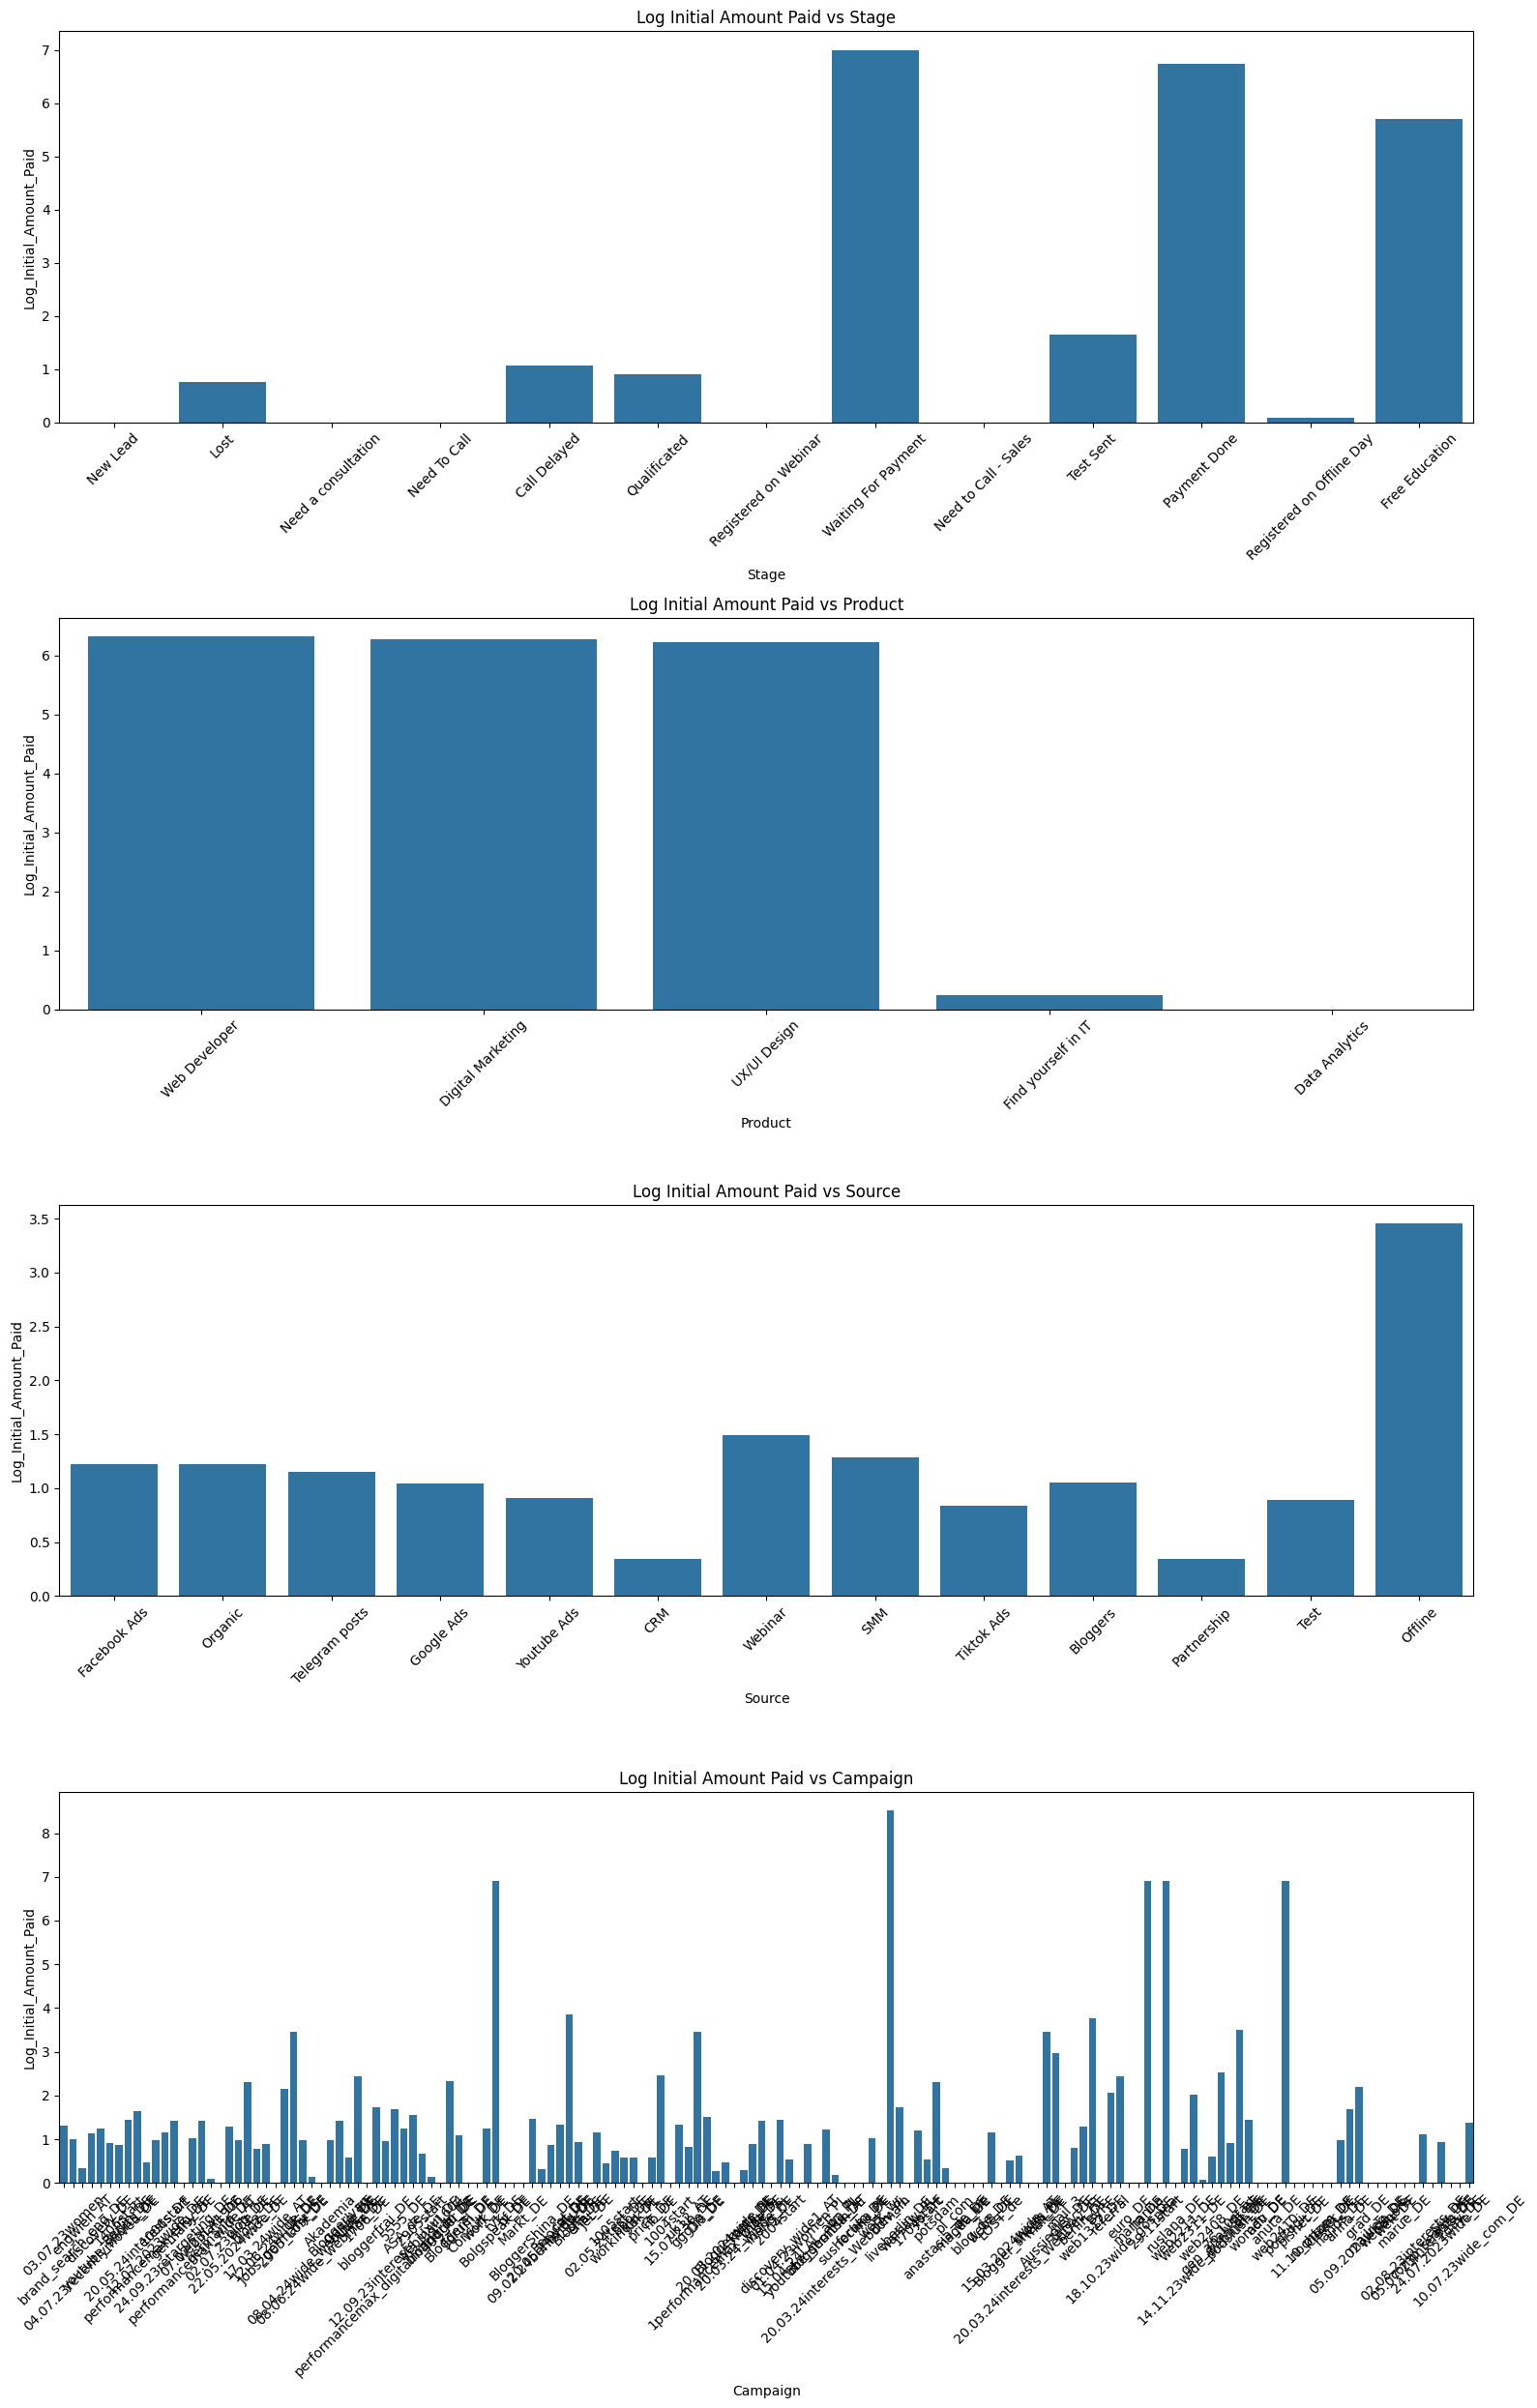

In [ ]:
# Check if the 'Log_Initial_Amount_Paid' column exists
if 'Log_Initial_Amount_Paid' not in df_new.columns:
    # If the column does not exist, create it
    df_new['Log_Initial_Amount_Paid'] = np.log1p(pd.to_numeric(df_new['Initial Amount Paid'], errors='coerce').fillna(0))

# Define categorical columns for analysis
selected_categorical_columns = ['Stage', 'Product', 'Source', 'Campaign']

# Plot barplots for Initial Amount Paid by categorical variables
plt.figure(figsize=(16, 25))
for i, col in enumerate(selected_categorical_columns, 1):
    plt.subplot(len(selected_categorical_columns), 1, i)
    sns.barplot(x=col, y='Initial Amount Paid', data=df_new, errorbar=None)
    plt.title(f'Initial Amount Paid vs {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyze the log-transformed cost for the same categorical variables
plt.figure(figsize=(16, 25))
for i, col in enumerate(selected_categorical_columns, 1):
    plt.subplot(len(selected_categorical_columns), 1, i)
    sns.barplot(x=col, y='Log_Initial_Amount_Paid', data=df_new, errorbar=None)
    plt.title(f'Log Initial Amount Paid vs {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusions
Course Duration Distribution:
The histogram and boxplot show that most learners complete the course in about 10-11 months. There is a minor outlier around the 6-month mark, which may indicate a different product.

Months of Study:
The boxplot for months of study reveals significant variability among students. Some students complete their studies earlier (as seen by the number of students studying for less than 11 months). This may indicate issues in the training program. It is recommended to survey these students to understand the reasons and make necessary adjustments to the training program.

Initial Payment and Offer Total Amount:
A substantial portion of initial payments and final offers are concentrated in the range of up to 2000. This suggests the popularity of lower-cost offers, but there are also outliers around 10,000–11,500, likely payments made by social services as part of grants.

Product Data:
The boxplot highlights anomalous data for products. Some categories, such as "Find yourself in IT" and "Data Analytics," appear to be incorrectly filled or have insufficient data for analysis. It is necessary to verify data entry and exclude erroneous values before analysis.

Lead Source:
In terms of sources (Source), higher payments come from offline events, while other channels, such as Facebook Ads, YouTube Ads, CRM, and SMM, yield comparatively lower payments.

Campaign and its Impact on Payment:
The campaigns vary widely in terms of number and effectiveness. Some campaigns yield high amounts, but most exhibit low payment effectiveness. This requires a more detailed analysis of campaign performance.

It is essential to delve deeper into the reasons why clients did not complete the course or declined offers to identify main obstacles and potentially improve the product or sales process.

Data Quality:
Attention should be given to data cleansing, especially for products and campaigns, where there may be errors or omissions that affect analysis accuracy. The data is weakly susceptible to correction.

In [ ]:
# Fill missing values before logarithm transformation and apply type conversion
df_new['Initial Amount Paid'] = pd.to_numeric(df_new['Initial Amount Paid'].fillna(0), errors='coerce')
df_new['Offer Total Amount'] = pd.to_numeric(df_new['Offer Total Amount'].fillna(0), errors='coerce')
df_new['SLA_seconds'] = pd.to_numeric(df_new['SLA_seconds'].fillna(0), errors='coerce')

# Apply logarithm transformation to variables
df_new['Log_Initial_Amount_Paid'] = np.log1p(df_new['Initial Amount Paid'])
df_new['Log_Offer_Total_Amount'] = np.log1p(df_new['Offer Total Amount'])
df_new['Log_SLA_seconds'] = np.log1p(df_new['SLA_seconds'])

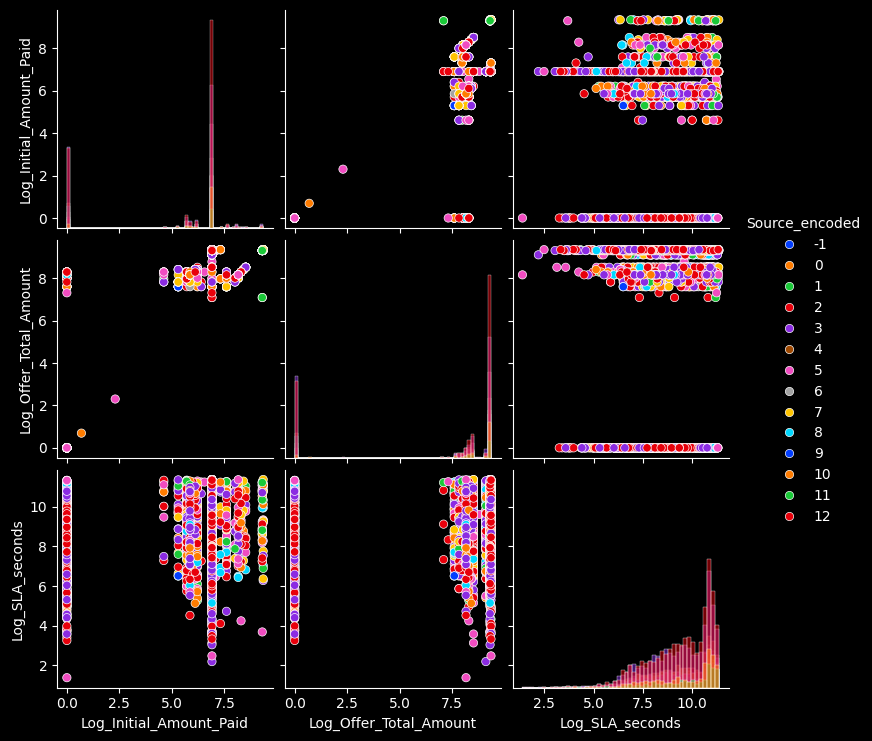

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Encode the categorical column Source
df_new['Source_encoded'] = df_new['Source'].astype('category').cat.codes

# Apply dark style
plt.style.use('dark_background')

# Visualize log-transformed quantitative variables with the Source category
g = sns.pairplot(df_new[['Log_Initial_Amount_Paid', 'Log_Offer_Total_Amount', 'Log_SLA_seconds', 'Source_encoded']], 
                 diag_kind="hist", 
                 hue='Source_encoded',  # Categories with colors
                 palette='bright')  # Bright color palette

# Customize axis colors, titles, and scales
plt.gcf().set_facecolor('black')  # Set plot background to black
for ax in plt.gcf().get_axes():
    ax.tick_params(colors='white')  # White color for axis tick labels
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.title.set_color('white')  # White color for titles
    ax.xaxis.label.set_color('white')  # White color for axis labels
    ax.yaxis.label.set_color('white')

plt.show()

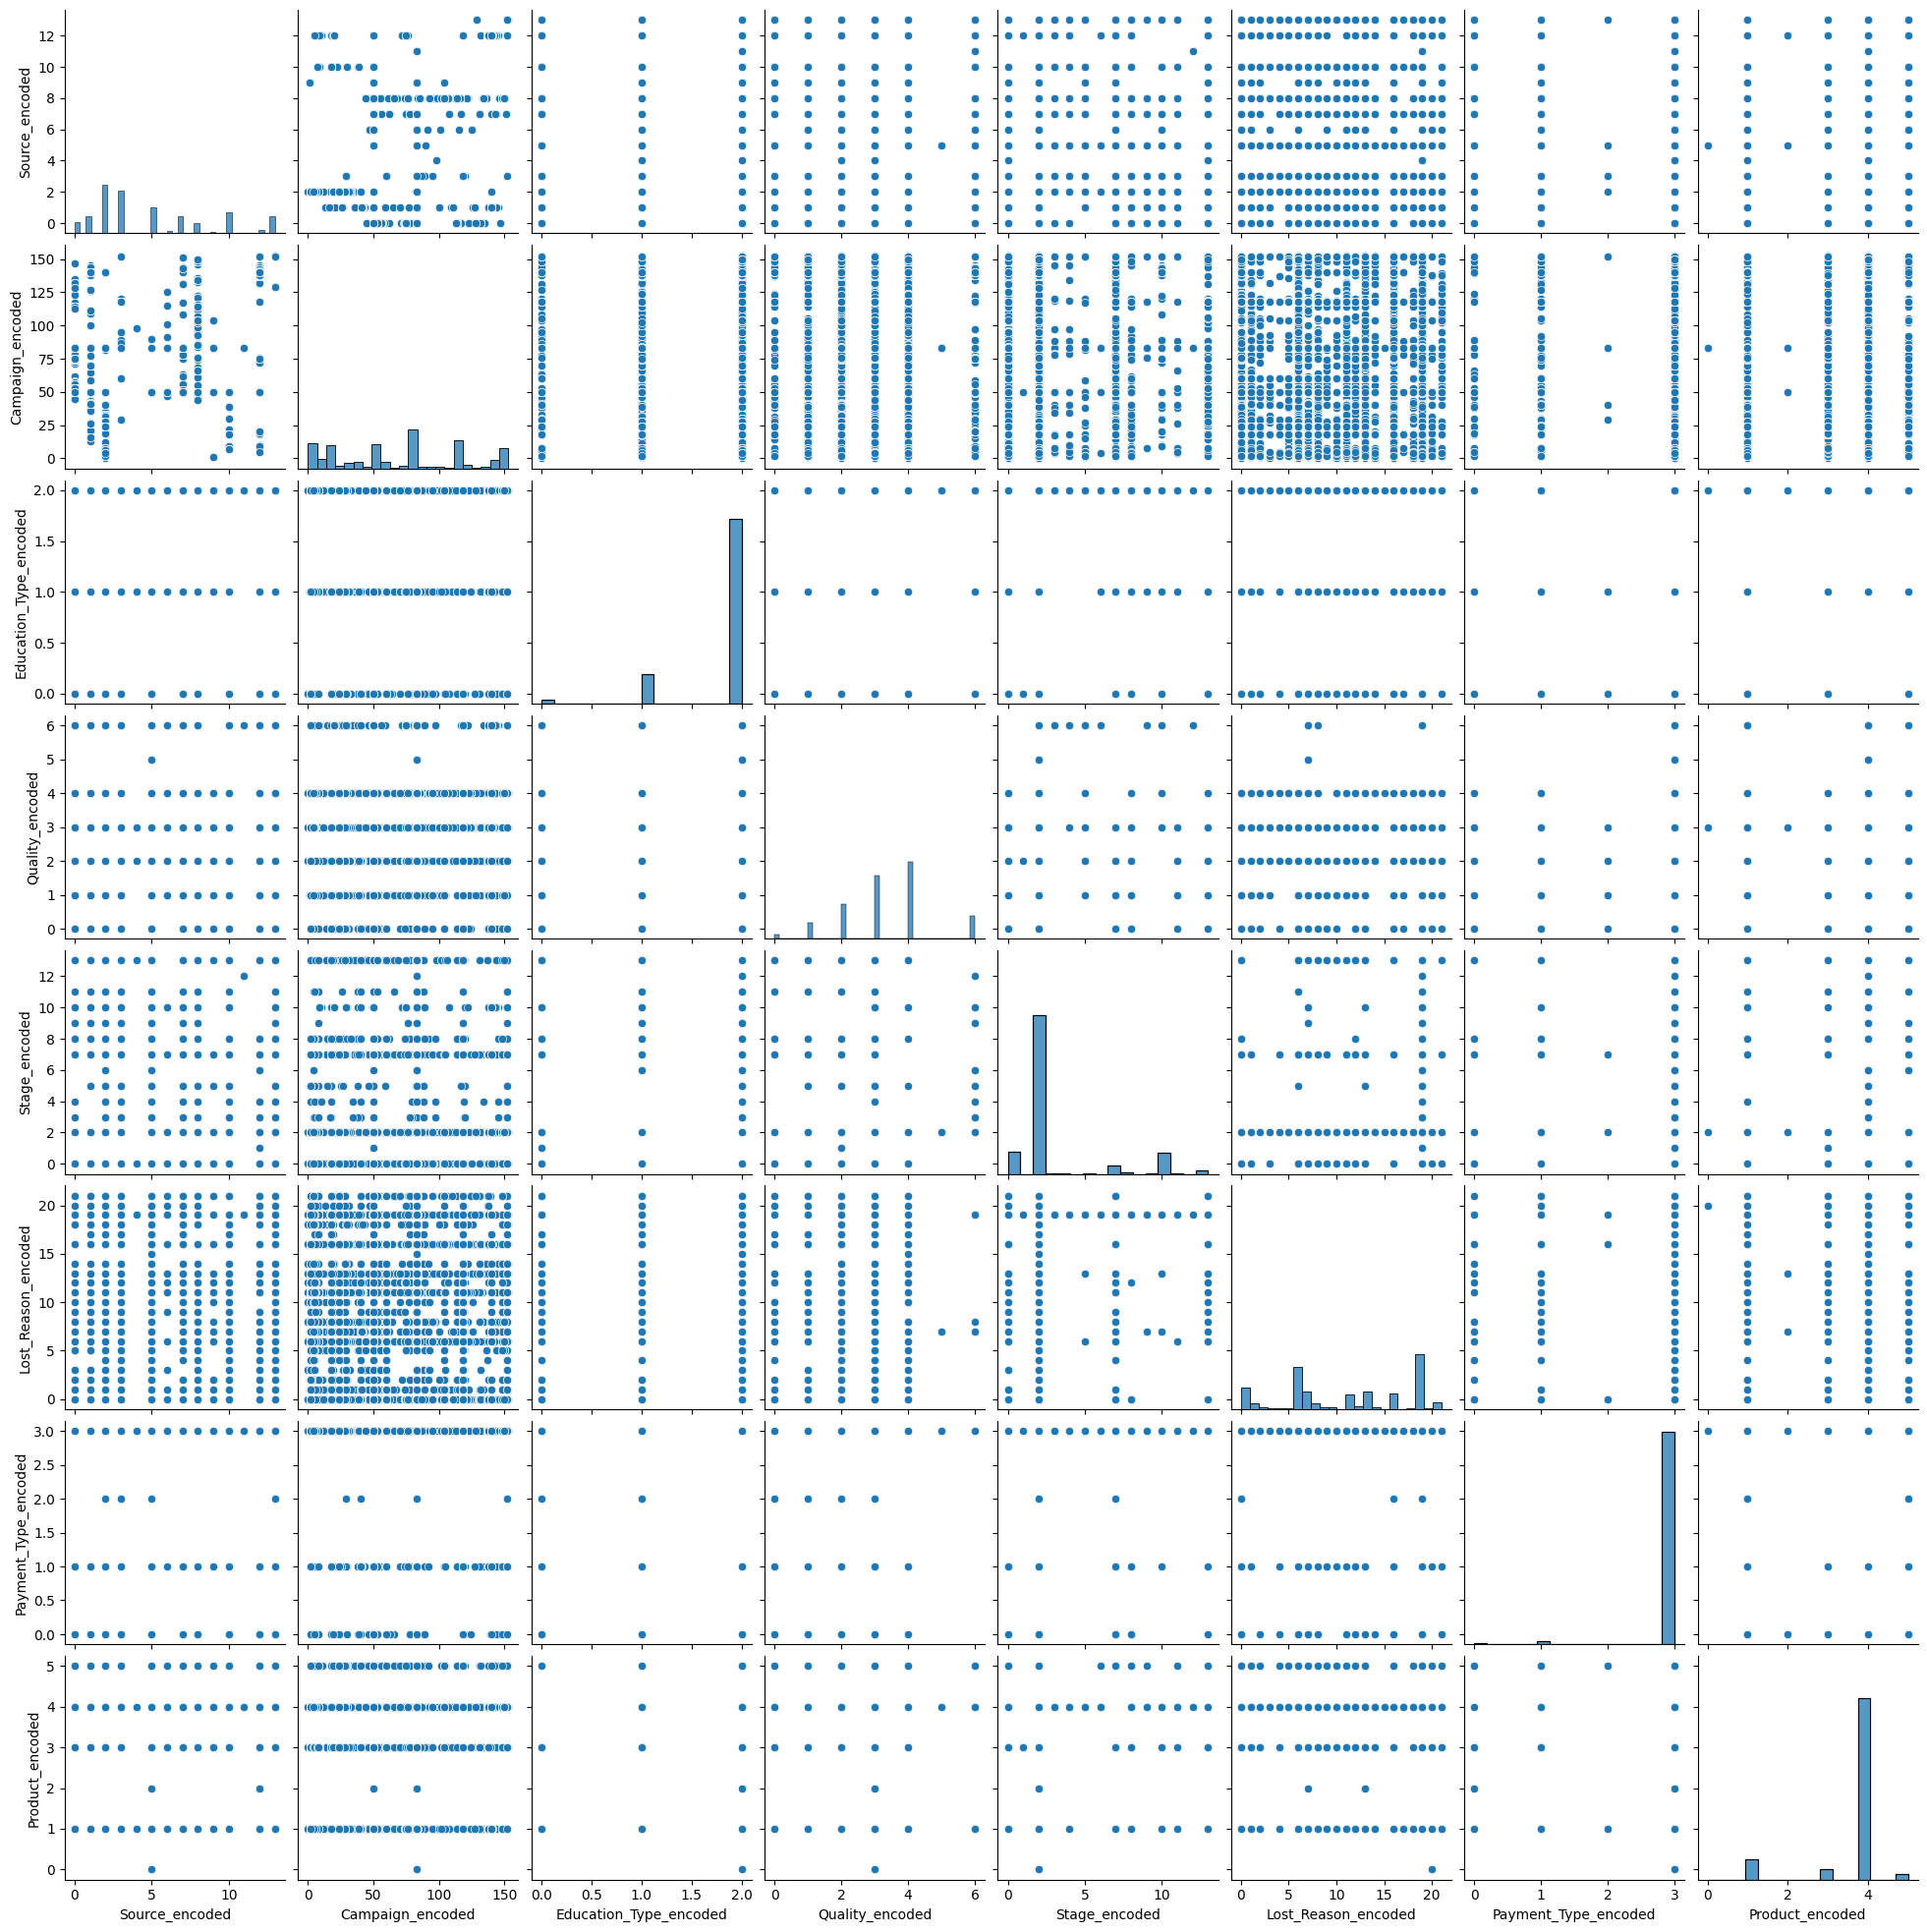

In [ ]:
# Copy the dataframe to avoid modifying the original
df_encoded = df_new.copy()

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fill missing values in categorical variables with 'Unknown' to avoid errors during encoding
df_encoded['Source'] = df_encoded['Source'].fillna('Unknown')
df_encoded['Campaign'] = df_encoded['Campaign'].fillna('Unknown')
df_encoded['Education Type'] = df_encoded['Education Type'].fillna('Unknown')
df_encoded['Quality'] = df_encoded['Quality'].fillna('Unknown')
df_encoded['Stage'] = df_encoded['Stage'].fillna('Unknown')
df_encoded['Lost Reason'] = df_encoded['Lost Reason'].fillna('Unknown')
df_encoded['Payment Type'] = df_encoded['Payment Type'].fillna('Unknown')
df_encoded['Product'] = df_encoded['Product'].fillna('Unknown')

# Encode categorical variables
df_encoded['Source_encoded'] = label_encoder.fit_transform(df_encoded['Source'])
df_encoded['Campaign_encoded'] = label_encoder.fit_transform(df_encoded['Campaign'])
df_encoded['Education_Type_encoded'] = label_encoder.fit_transform(df_encoded['Education Type'])
df_encoded['Quality_encoded'] = label_encoder.fit_transform(df_encoded['Quality'])
df_encoded['Stage_encoded'] = label_encoder.fit_transform(df_encoded['Stage'])
df_encoded['Lost_Reason_encoded'] = label_encoder.fit_transform(df_encoded['Lost Reason'])
df_encoded['Payment_Type_encoded'] = label_encoder.fit_transform(df_encoded['Payment Type'])
df_encoded['Product_encoded'] = label_encoder.fit_transform(df_encoded['Product'])

# Plot a pairplot for encoded categorical variables
sns.pairplot(df_encoded[['Source_encoded', 'Campaign_encoded', 'Education_Type_encoded', 
                         'Quality_encoded', 'Stage_encoded', 'Lost_Reason_encoded', 
                         'Payment_Type_encoded', 'Product_encoded']])
plt.show()

## Conclusions
Log Transformation of Cost Variables:
Log-transforming cost variables (Initial Amount Paid, Offer Total Amount) helped to smooth the distribution and reveal hidden dependencies. However, there are still outliers in the data that require further analysis and possibly adjustments for a more accurate model.

Differences in Distribution by Source and Campaigns:
Sharp differences are visible in distribution by sources and campaigns. Campaigns show significant variation in the amount spent, potentially related to the effectiveness of different marketing channels. Sources such as "Offline" and "CRM" also show a substantial number of payments.

Product and Education Type:
There are erroneous data entries (e.g., missing products or values in Education Type), which complicate deeper analysis. These columns need to be cleaned and checked for data accuracy.

Stage and Payment Type:
Deal stages such as "Payment Done" and "Registered on Offline Day" correlate with larger payment amounts. This is expected, as successful deals lead to payments.

Lost Reason:
Frequent reasons for deal losses, such as "Non target" and "Invalid number," stand out. These reasons deserve further analysis and may indicate areas for improvement in lead handling.

Attention to Non-Completing Students:
As discussed earlier, attention should be given to students who do not complete their studies (visible in the "Months of study" boxplot). Addressing this issue may help improve the learning process and reduce student dropout rates.

In [ ]:
# Function to determine outlier boundaries using IQR
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Apply to log-transformed variables
columns_to_check = ['Log_Initial_Amount_Paid', 'Log_Offer_Total_Amount', 'Log_SLA_seconds']
outliers = {}

for col in columns_to_check:
    lower, upper = detect_outliers_iqr(df_new[col])
    outliers[col] = df_new[(df_new[col] < lower) | (df_new[col] > upper)]

# Output the number of outliers
for col, outlier_df in outliers.items():
    print(f"Number of outliers for {col}: {len(outlier_df)}")

Количество выбросов для Log_Initial_Amount_Paid: 3287
Количество выбросов для Log_Offer_Total_Amount: 3336
Количество выбросов для Log_SLA_seconds: 0


In [ ]:
# View outliers for each variable
for col, outlier_df in outliers.items():
    print(f"Outliers for {col}:")
    display(outlier_df[['Initial Amount Paid', 'Offer Total Amount', 'SLA', 'Campaign', 'Source', 'Stage']])

Выбросы для Log_Initial_Amount_Paid:


,Initial Amount Paid,Offer Total Amount,SLA,Campaign,Source,Stage
56,1000.0,9000.0,00:20:39,performancemax_eng_DE,Google Ads,Waiting For Payment
60,1000.0,9000.0,00:09:49,Berlin_DE,SMM,Waiting For Payment
65,1000.0,11000.0,01:55:11,03.07.23women,Facebook Ads,Waiting For Payment
71,1000.0,11000.0,12:51:39,20.05.24interests_DE,Facebook Ads,Waiting For Payment
75,1000.0,11000.0,NaT,brand_search_eng_DE,Google Ads,Waiting For Payment
...,...,...,...,...,...,...
21567,1000.0,11500.0,03:57:36,02.07.23wide_DE,Facebook Ads,Lost
21574,1000.0,11500.0,08:46:54,performancemax_digitalmarkt_ru_DE,Google Ads,Lost
21578,1000.0,11000.0,18:22:16,02.07.23wide_DE,Facebook Ads,Lost
21585,1000.0,11500.0,23:12:53,03.07.23women,Facebook Ads,Call Delayed


Выбросы для Log_Offer_Total_Amount:


,Initial Amount Paid,Offer Total Amount,SLA,Campaign,Source,Stage
1,0.0,2000.0,NaT,brand_search_eng_DE,Organic,New Lead
56,1000.0,9000.0,00:20:39,performancemax_eng_DE,Google Ads,Waiting For Payment
60,1000.0,9000.0,00:09:49,Berlin_DE,SMM,Waiting For Payment
65,1000.0,11000.0,01:55:11,03.07.23women,Facebook Ads,Waiting For Payment
71,1000.0,11000.0,12:51:39,20.05.24interests_DE,Facebook Ads,Waiting For Payment
...,...,...,...,...,...,...
21567,1000.0,11500.0,03:57:36,02.07.23wide_DE,Facebook Ads,Lost
21574,1000.0,11500.0,08:46:54,performancemax_digitalmarkt_ru_DE,Google Ads,Lost
21578,1000.0,11000.0,18:22:16,02.07.23wide_DE,Facebook Ads,Lost
21585,1000.0,11500.0,23:12:53,03.07.23women,Facebook Ads,Call Delayed


Выбросы для Log_SLA_seconds:


,Initial Amount Paid,Offer Total Amount,SLA,Campaign,Source,Stage


## Conclusions
During the investigation of outliers, no anomalies were detected, which is likely due to the small amount of data that cannot be supplemented.

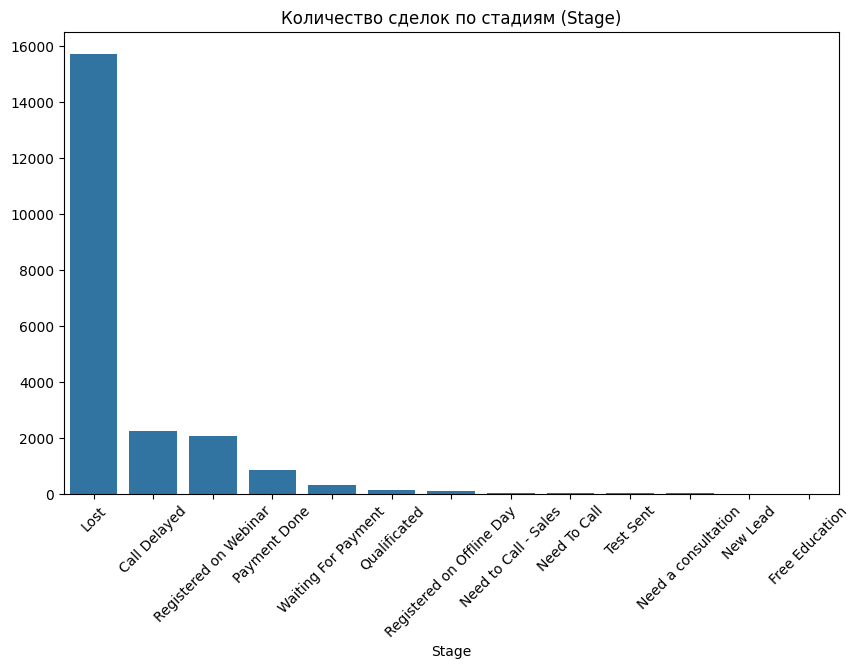

In [ ]:
# Count the number of deals at each stage
stage_counts = df_new['Stage'].value_counts()

# Plot for stage analysis
plt.figure(figsize=(10, 6))
sns.barplot(x=stage_counts.index, y=stage_counts.values)
plt.xticks(rotation=45)
plt.title('Number of Deals by Stage')
plt.show()

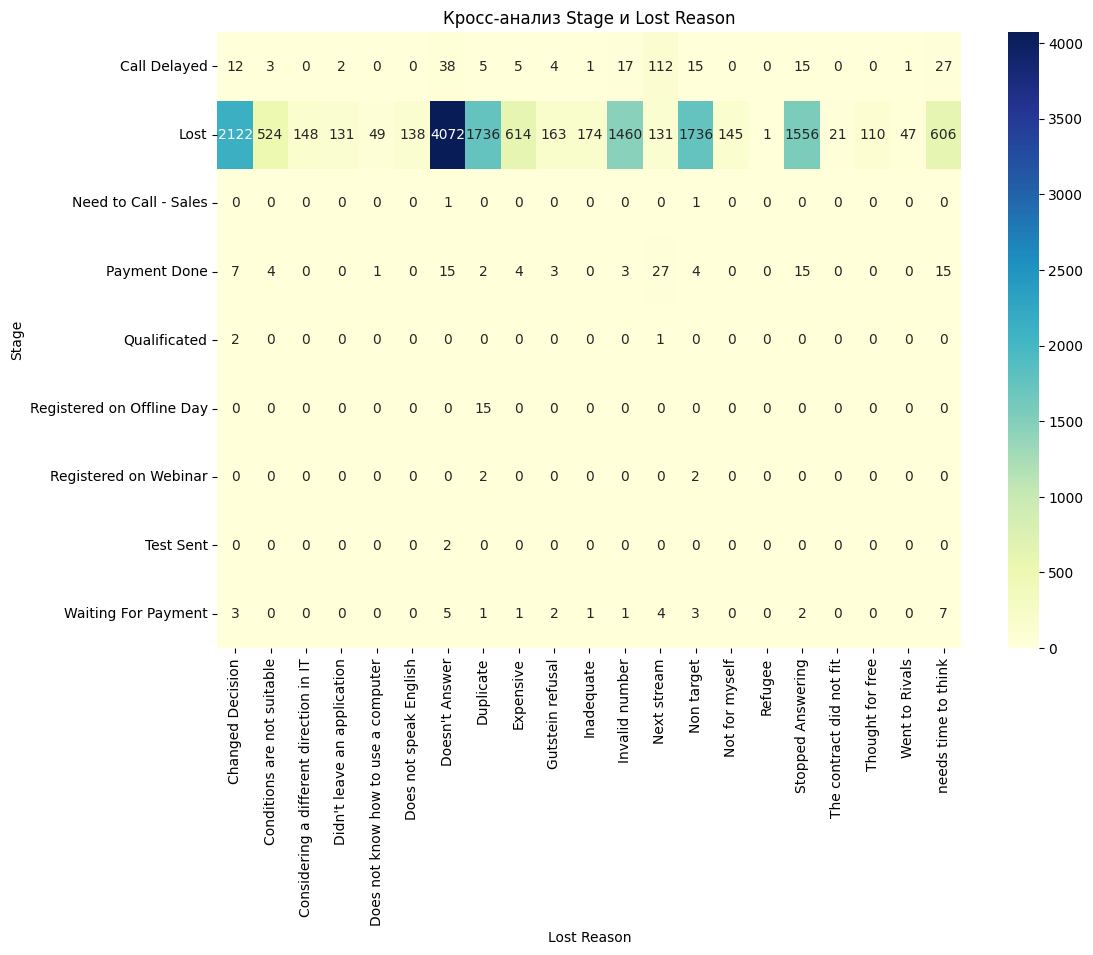

In [ ]:
# Pivot table for cross-analysis of Stage and Lost Reason
cross_tab = pd.crosstab(df_new['Stage'], df_new['Lost Reason'])

# Plot a heatmap for visualization
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Cross-analysis of Stage and Lost Reason')
plt.show()

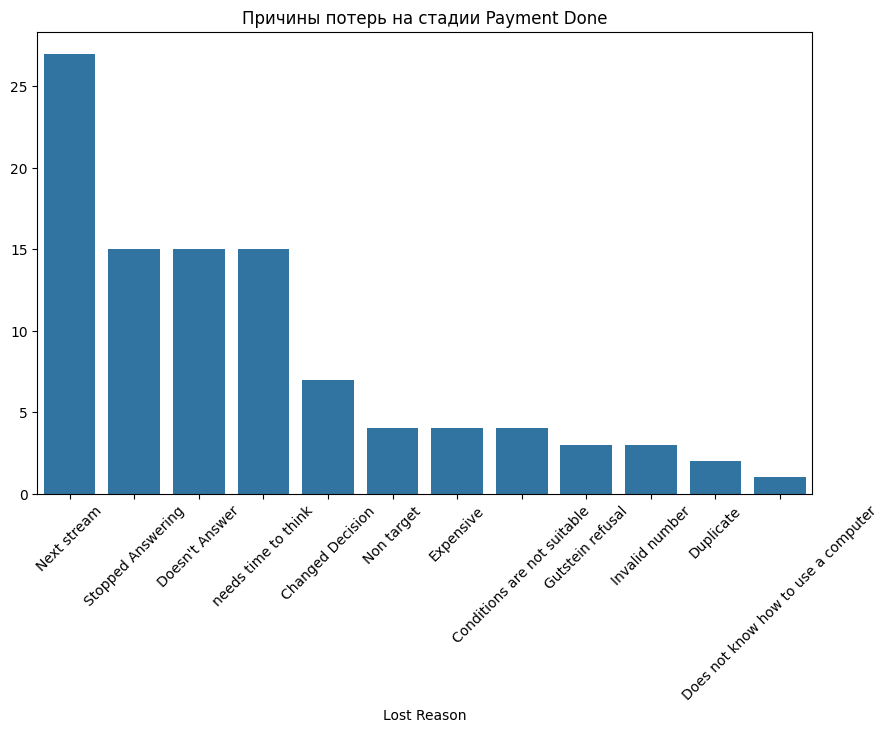

In [ ]:
# Filter data by important stages (e.g., 'Payment Done')
important_stage_df = df_new[df_new['Stage'] == 'Payment Done']

# Analyze the distribution of lost reasons at this stage
important_stage_lost_reason_counts = important_stage_df['Lost Reason'].value_counts()

# Plot for analysis of lost reasons at the 'Payment Done' stage
plt.figure(figsize=(10, 6))
sns.barplot(x=important_stage_lost_reason_counts.index, y=important_stage_lost_reason_counts.values)
plt.xticks(rotation=45)
plt.title('Lost Reasons at Payment Done Stage')
plt.show()

## Conclusions
Lost Reasons at the "Payment Done" Stage:

The leading reason is "Next Stream." Given its high occurrence, this is one of the main issues preventing deal completion. It may be worthwhile to analyze the process to identify what prompts people to drop off at this stage and consider alternatives to retain clients.
There are also many losses due to "Stopped Answering" and "Doesn't Answer." This points to communication issues that could be addressed by improving contact methods or using more proactive channels to reach clients.

A significant portion of deals are at the "Lost" stage. This is a concerning indicator, requiring detailed examination to understand the reasons behind such high losses. For instance, analyzing which substages see the most client drop-offs and identifying typical barriers could be beneficial.
"Call Delayed" also stands out as a significant loss reason, which may indicate response delays or a lack of timely follow-up by managers.

Cross-Analysis of "Stage" and "Lost Reason":
The heatmap shows that most deals in the "Lost" stage are associated with various reasons, including "Next Stream," "Stopped Answering," and others. Some loss reasons, like "Duplicate," may require more detailed analysis and potential data cleanup.

Further examination of the "Duplicate" reason is needed. It is worth investigating the assignment mechanism for this reason, as it may contain errors. Assessing how frequently and accurately users apply this label and determining whether the duplicate identification process can be automated or improved would be helpful.

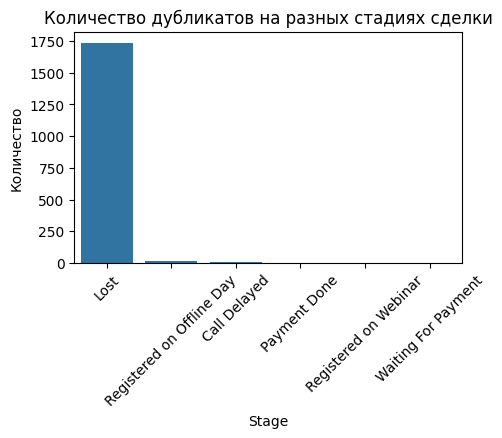

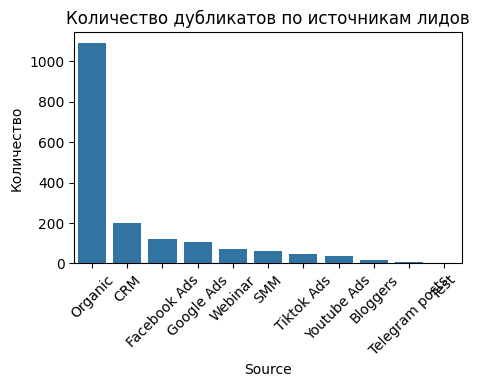

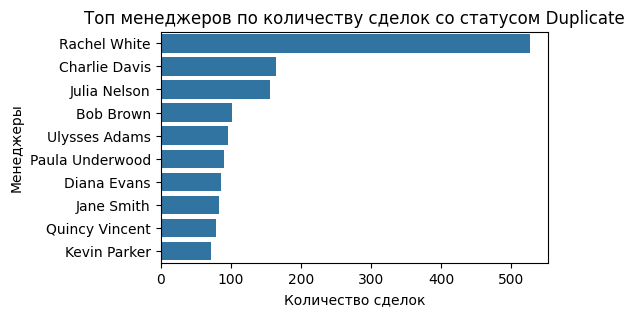

In [ ]:
# Filter deals by lost reason 'Duplicate'
df_duplicate = df_new[df_new['Lost Reason'] == 'Duplicate']

# Examine the stages where duplicates appear most frequently
duplicate_stage_counts = df_duplicate['Stage'].value_counts()

# Plot the distribution of stages for duplicates
plt.figure(figsize=(5, 3))
sns.barplot(x=duplicate_stage_counts.index, y=duplicate_stage_counts.values)
plt.title('Number of Duplicates at Different Deal Stages')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Also check the sources from which duplicates most often originate
duplicate_source_counts = df_duplicate['Source'].value_counts()

# Plot the distribution of sources for duplicates
plt.figure(figsize=(5, 3))
sns.barplot(x=duplicate_source_counts.index, y=duplicate_source_counts.values)
plt.title('Number of Duplicates by Lead Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Group data by managers and count the number of deals with 'Duplicate' status
duplicate_manager_counts = df_duplicate['Deal Owner Name'].value_counts().head(10)  # Display top 10 managers

# Plot the distribution by manager
plt.figure(figsize=(5, 3))
sns.barplot(x=duplicate_manager_counts.values, y=duplicate_manager_counts.index, orient='h')
plt.title('Top Managers by Number of Deals with Duplicate Status')
plt.xlabel('Number of Deals')
plt.ylabel('Managers')
plt.show()

## Conclusions
Sources of Duplicates:
Most duplicate leads originate from the Organic source, which may indicate that organic traffic leads to repeated applications from the same users, or the system incorrectly identifies duplicates.

Duplicates by Stages:
The majority of deals marked as "Duplicate" are in the Lost stage, which is logical, as such deals are likely considered irrelevant or erroneous.

Managers Frequently Using "Duplicate" Status:
The top manager by the number of "Duplicate" status deals is Rachel White, followed by Charlie Davis and Julia Nelson. This may indicate that these managers encounter duplicates more often than others, warranting further investigation. I would recommend reaching out to these managers to understand the patterns they use for assigning this status. Notably, during a thorough analysis, I detected numerous inconsistencies in the patterns used to label duplicates.

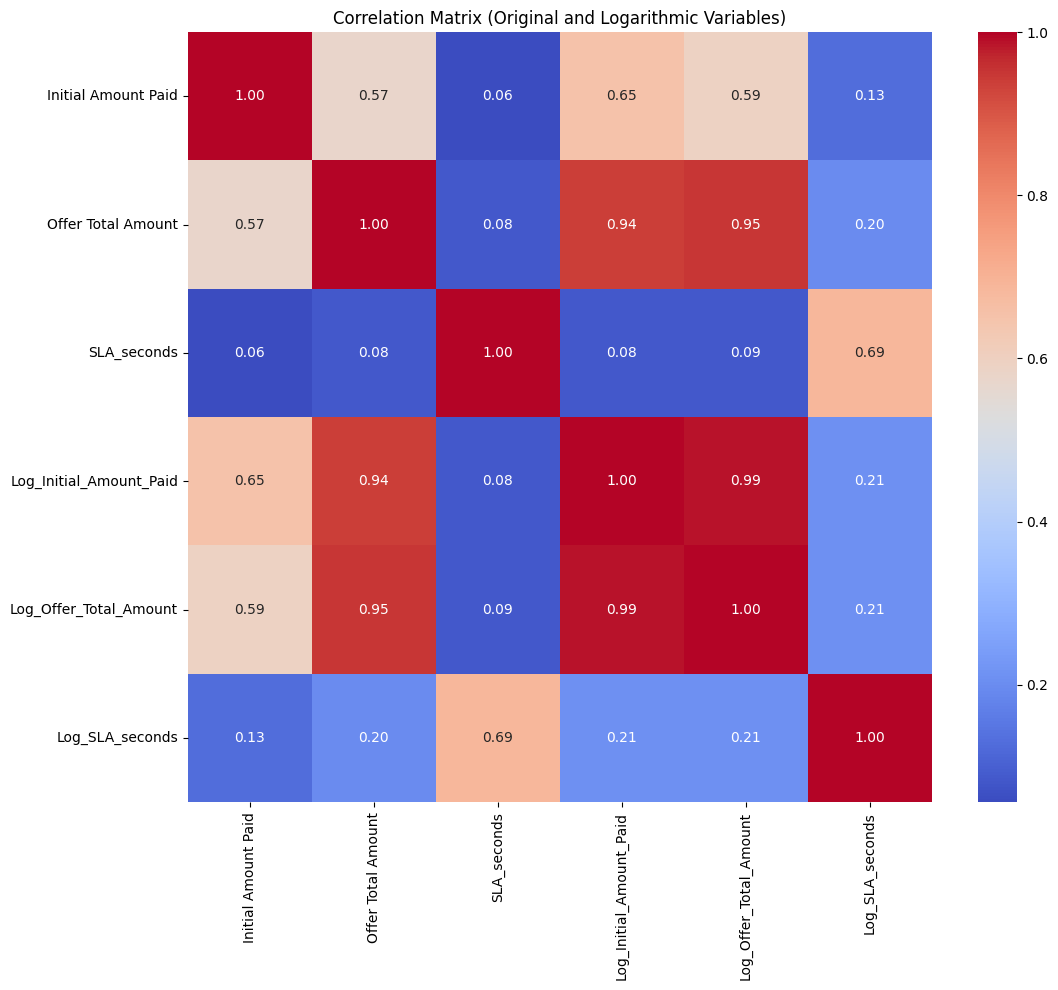

In [ ]:
# Calculate the correlation matrix for original and log-transformed variables
numerical_columns_log = ['Initial Amount Paid', 'Offer Total Amount', 'SLA_seconds', 
                         'Log_Initial_Amount_Paid', 'Log_Offer_Total_Amount', 'Log_SLA_seconds']

# Correlation matrix
correlation_matrix_log = df_new[numerical_columns_log].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_log, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Original and Logarithmic Variables)')
plt.show()

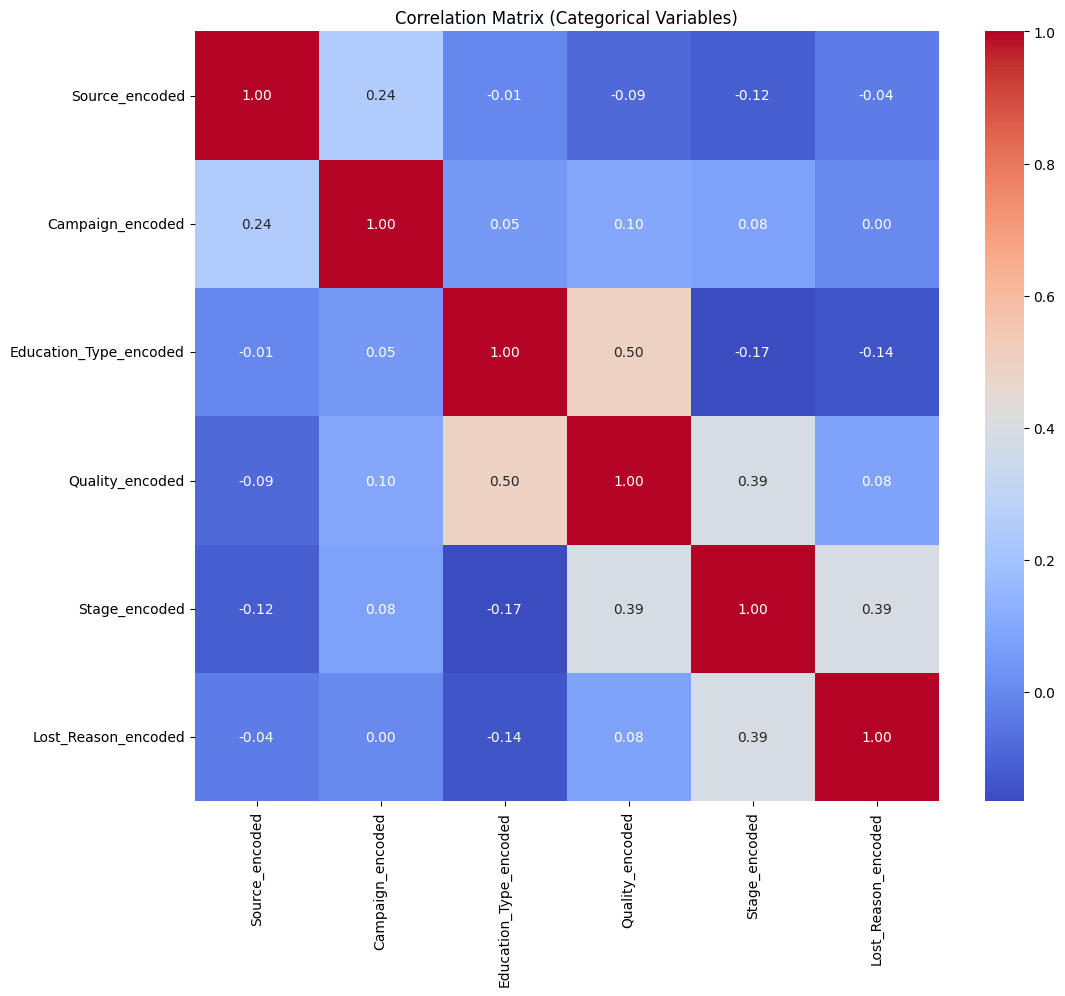

In [ ]:
# Calculate the correlation matrix for categorical variables
categorical_columns_encoded = ['Source_encoded', 'Campaign_encoded', 'Education_Type_encoded', 'Quality_encoded', 'Stage_encoded', 'Lost_Reason_encoded']

# Correlation matrix for categorical variables
correlation_matrix_cat = df_encoded[categorical_columns_encoded].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_cat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Categorical Variables)')
plt.show()

##Conclusions
Correlation of Categorical Variables:

There is a significant positive correlation between Education_Type_encoded and Quality_encoded (0.50), which may indicate a relationship between the type of education and the quality of the deal.
Stage_encoded has a moderate correlation with both Quality_encoded (0.39) and Lost_Reason_encoded (0.39), suggesting that deal stages and lost reasons may be related to deal quality and losses.
Correlation of Quantitative and Logarithmic Variables:

Log-transformed variables, Log_Initial_Amount_Paid and Log_Offer_Total_Amount, have a strong correlation with each other (0.99), which is expected, as logarithmic transformation reduces data spread while maintaining their ratio.
Positive correlation between the log-transformed payment amounts (Log_Initial_Amount_Paid and Log_Offer_Total_Amount) and their original values (Initial Amount Paid and Offer Total Amount) is also expected (from 0.94 to 0.95).
An interesting observation: response time (SLA_seconds and its logarithm) has a moderate correlation with offered amounts (0.20 and 0.21), which may suggest that deals with higher amounts require more processing time or follow-up.